<a href="https://colab.research.google.com/github/Kusvihawan/Regresi/blob/master/Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Data Science Course - Telkom Digital Talent Incubator*


---




# **Classification**

Memproses data dari (https://www.kaggle.com/janiobachmann/bank-marketing-dataset/bank.csv) untuk di melakukan klasifikasi dengan target deposit


Import Libraries

In [1]:
# Import Library
import pandas as pd

Import Raw Dataset

In [2]:
# Import Data to Google Colab
df = pd.read_csv('https://raw.githubusercontent.com/Kusvihawan/Regresi/master/bank.csv', sep = ',')
df

# Show 10 first Row
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [3]:
# Prints the Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
# Prints Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


Data Preprocessing

Handling Missing Values

In [5]:
# Check for Missing Values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Encode Categorical Data

In [6]:
# Encode Categorical Data
df['default'].replace('no',0, inplace=True)
df['default'].replace('yes',1, inplace=True)
df['housing'].replace('no',0, inplace=True)
df['housing'].replace('yes',1, inplace=True)
df['loan'].replace('no',0, inplace=True)
df['loan'].replace('yes',1, inplace=True)
df['deposit'].replace('no',0, inplace=True)
df['deposit'].replace('yes',1, inplace=True)
df_encoded = pd.get_dummies(df, columns=['job', 'education', 'marital', 'contact', 'poutcome', 'month'])

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   default              11162 non-null  int64
 2   balance              11162 non-null  int64
 3   housing              11162 non-null  int64
 4   loan                 11162 non-null  int64
 5   day                  11162 non-null  int64
 6   duration             11162 non-null  int64
 7   campaign             11162 non-null  int64
 8   pdays                11162 non-null  int64
 9   previous             11162 non-null  int64
 10  deposit              11162 non-null  int64
 11  job_admin.           11162 non-null  uint8
 12  job_blue-collar      11162 non-null  uint8
 13  job_entrepreneur     11162 non-null  uint8
 14  job_housemaid        11162 non-null  uint8
 15  job_management       11162 non-null  uint8
 16  job_retired          1

In [7]:
#Show encoded data frame
df_encoded.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,59,56,41,55,54,42,56,60,37,28
default,0,0,0,0,0,0,0,0,0,0
balance,2343,45,1270,2476,184,0,830,545,1,5090
housing,1,0,1,1,0,1,1,1,1,1
loan,0,0,0,0,0,1,1,0,0,0
day,5,5,5,5,5,5,6,6,6,6
duration,1042,1467,1389,579,673,562,1201,1030,608,1297
campaign,1,1,1,1,2,2,1,1,1,3
pdays,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
previous,0,0,0,0,0,0,0,0,0,0


Set Feature and Target

In [8]:
# Select Features
feature = df_encoded.drop(['deposit'], axis=1)
feature

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,59,0,2343,1,0,5,1042,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,56,0,45,0,0,5,1467,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,41,0,1270,1,0,5,1389,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,55,0,2476,1,0,5,579,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,54,0,184,0,0,5,673,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,20,257,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
11158,39,0,733,0,0,16,83,4,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
11159,32,0,29,0,0,19,156,2,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
11160,43,0,0,0,1,8,9,2,172,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [9]:
# Select Target
target = df_encoded['deposit']
target

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

Set Training and Testing Data

In [10]:
# Set Training and Testing Data (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(feature , target, shuffle = True, test_size=0.3, random_state=1)

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7813, 48)
(3349, 48)
(7813,)
(3349,)


In [11]:
X_test

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
8422,31,0,554,1,0,5,94,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
9226,43,0,514,1,1,20,34,2,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
8162,26,0,277,0,0,14,514,2,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4337,39,0,91,0,0,3,213,1,185,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2438,40,0,0,0,0,6,131,2,98,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5642,36,0,561,1,0,9,198,2,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2698,50,0,810,0,0,15,91,1,103,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
9515,35,0,451,1,0,17,220,6,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2651,47,0,3033,0,0,8,293,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [12]:
y_test

8422    0
9226    0
8162    0
4337    1
2438    1
       ..
5642    0
2698    1
9515    0
2651    1
6891    0
Name: deposit, Length: 3349, dtype: int64

#### ***Decision Tree***

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making.

Modeling Decision Tree

In [13]:
# Import Module
from sklearn import tree

# Modeling Decision Tree
dtc = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
dtc.fit(X_train, y_train)

# Predict to Test Data 
y_pred_dtc = dtc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


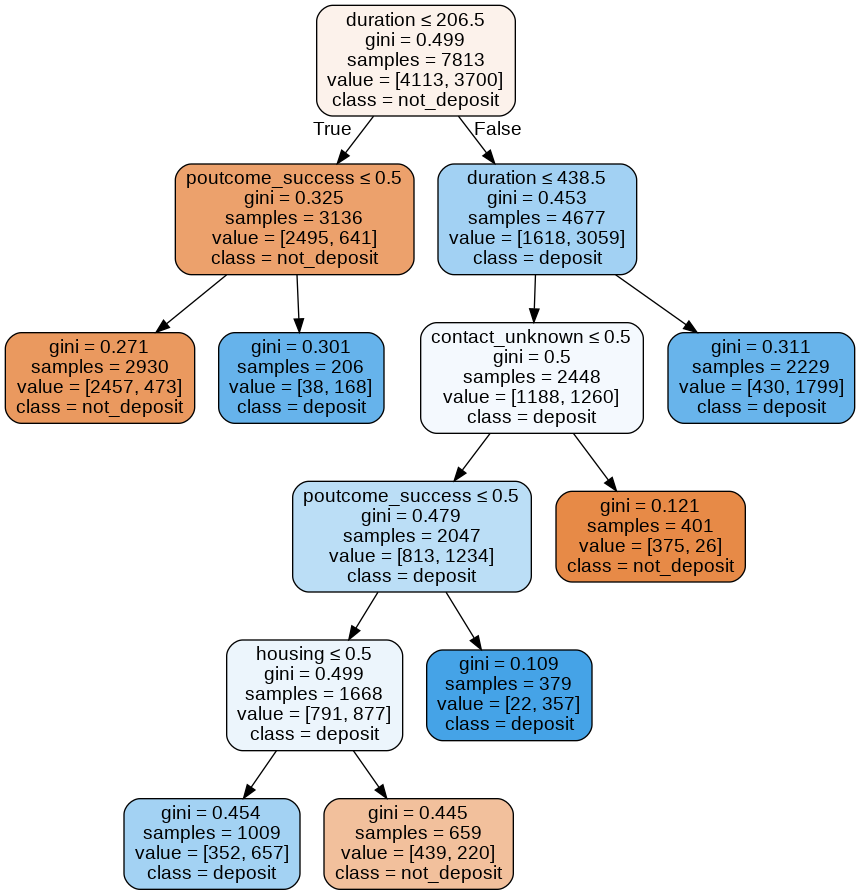

In [14]:
# Visualize Tree

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                class_names=['not_deposit', 'deposit'],
                feature_names=['age',	'default', 'balance',	'housing',	'loan',	'day',	'duration',	'campaign',	'pdays',	'previous',
                               'job_admin.',	'job_blue-collar',	'job_entrepreneur',	'job_housemaid',	'job_management',	'job_retired',	'job_self-employed',
                               'job_services',	'job_student',	'job_technician',	'job_unemployed',	'job_unknown',	'education_primary',	'education_secondary',	'education_tertiary',	
                               'education_unknown',	'marital_divorced',	'marital_married',	'marital_single',	'contact_cellular',	'contact_telephone',	'contact_unknown',	'poutcome_failure',
                               'poutcome_other',	'poutcome_success',	'poutcome_unknown',	'month_apr',	'month_aug',	'month_dec',	'month_feb',	'month_jan',	'month_jul',	'month_jun',
                               'month_mar',	'month_may',	'month_nov',	'month_oct',	'month_sep'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Model Evaluation

In [15]:
# Import Module
from sklearn import metrics

# Show the Confussion Matrix
cm_dtc = metrics.confusion_matrix(y_test, y_pred_dtc)
cm_dtc

array([[1360,  400],
       [ 316, 1273]])

In [16]:
# Show the Accuracy, Precision, Recall
acc_dtc = metrics.accuracy_score(y_test, y_pred_dtc)
prec_dtc = metrics.precision_score(y_test, y_pred_dtc)
rec_dtc = metrics.recall_score(y_test, y_pred_dtc)
f1_dtc = metrics.f1_score(y_test, y_pred_dtc)
kappa_dtc = metrics.cohen_kappa_score(y_test, y_pred_dtc)

print("Accuracy:", acc_dtc)
print("Precision:", prec_dtc)
print("Recall:", rec_dtc)
print("F1 Score:", f1_dtc)
print("Cohens Kappa Score:", kappa_dtc)

Accuracy: 0.7862048372648551
Precision: 0.7609085475194262
Recall: 0.8011327879169289
F1 Score: 0.7805027590435316
Cohens Kappa Score: 0.5723901160630026


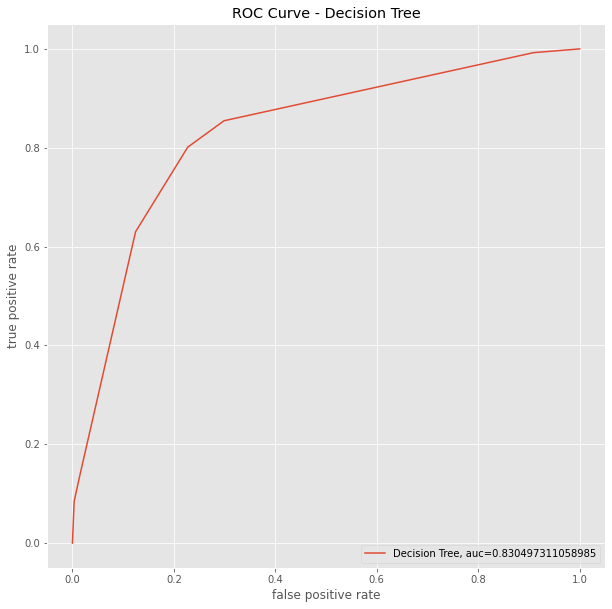

In [17]:
# Import Visualization Package
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_dtc_proba = dtc.predict_proba(X_test)[::,1]
fprdtc, tprdtc, _ = metrics.roc_curve(y_test,  y_pred_dtc_proba)
aucdtc = metrics.roc_auc_score(y_test, y_pred_dtc_proba)
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.title('ROC Curve - Decision Tree')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

#### ***Naive Bayes***

Modeling Naive Bayes

In [18]:
# Import Module
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 

# Modeling Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict to Test Data
y_pred_gnb= gnb.predict(X_test)

Model Evaluation

In [19]:
# Show the Confussion Matrix
cm_gnb = metrics.confusion_matrix(y_test, y_pred_gnb)
cm_gnb

array([[1503,  257],
       [ 624,  965]])

In [20]:
# Show the Accuracy, Precision, Recall
acc_gnb = metrics.accuracy_score(y_test, y_pred_gnb)
prec_gnb = metrics.precision_score(y_test, y_pred_gnb)
rec_gnb = metrics.recall_score(y_test, y_pred_gnb)
f1_gnb = metrics.f1_score(y_test, y_pred_gnb)
kappa_gnb = metrics.cohen_kappa_score(y_test, y_pred_gnb)

print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb)
print("Recall:", rec_gnb)
print("F1 Score:", f1_gnb)
print("Cohens Kappa Score:", kappa_gnb)

Accuracy: 0.7369363989250522
Precision: 0.7896890343698855
Recall: 0.6073001887979862
F1 Score: 0.6865884027036642
Cohens Kappa Score: 0.46651175666388145


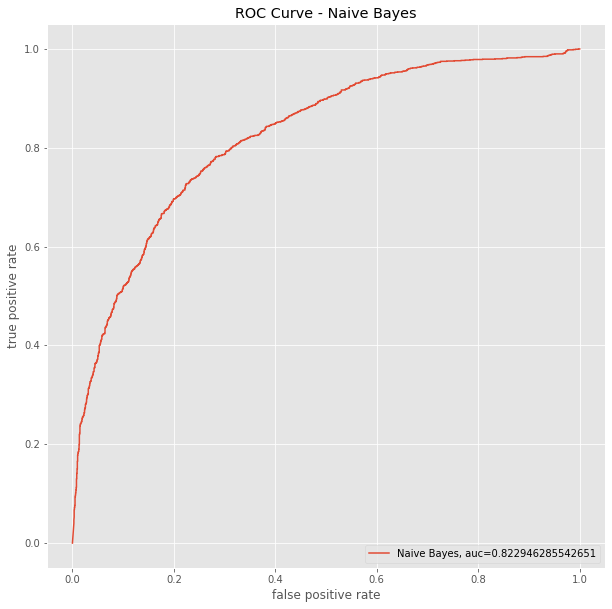

In [21]:
# ROC Curve
y_pred_gnb_proba = gnb.predict_proba(X_test)[::,1]
fprgnb, tprgnb, _ = metrics.roc_curve(y_test,  y_pred_gnb_proba)
aucgnb = metrics.roc_auc_score(y_test, y_pred_gnb_proba)
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

# Random Forest

In [22]:
# Import Module
from sklearn.ensemble import RandomForestClassifier

# Modeling Naive Bayes Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Predict to Test Data
y_pred_rfc= rfc.predict(X_test)

In [23]:
# Show the Confussion Matrix
cm_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)
cm_rfc

array([[1452,  308],
       [ 201, 1388]])

In [24]:
# Show the Accuracy, Precision, Recall
acc_rfc = metrics.accuracy_score(y_test, y_pred_rfc)
prec_rfc = metrics.precision_score(y_test, y_pred_rfc)
rec_rfc = metrics.recall_score(y_test, y_pred_rfc)
f1_rfc = metrics.f1_score(y_test, y_pred_rfc)
kappa_rfc = metrics.cohen_kappa_score(y_test, y_pred_rfc)

print("Accuracy:", acc_rfc)
print("Precision:", prec_rfc)
print("Recall:", rec_rfc)
print("F1 Score:", f1_rfc)
print("Cohens Kappa Score:", kappa_rfc)

Accuracy: 0.848014332636608
Precision: 0.8183962264150944
Recall: 0.8735053492762744
F1 Score: 0.8450532724505327
Cohens Kappa Score: 0.6962278161735997


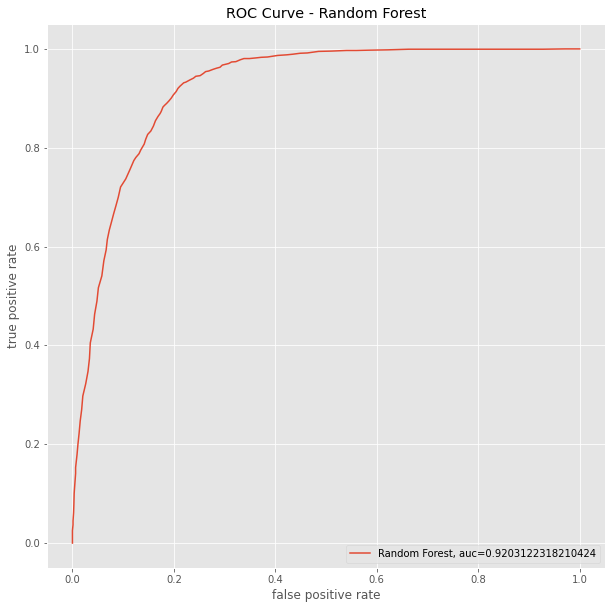

In [25]:
# ROC Curve
y_pred_rfc_proba = rfc.predict_proba(X_test)[::,1]
fprrfc, tprrfc, _ = metrics.roc_curve(y_test,  y_pred_rfc_proba)
aucrfc = metrics.roc_auc_score(y_test, y_pred_rfc_proba)
plt.plot(fprrfc,tprrfc,label="Random Forest, auc="+str(aucrfc))
plt.title('ROC Curve - Random Forest')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

#### ***Model Comparison***

In [26]:
# Comparing Model Performance
print("Decision Tree Accuracy =",acc_dtc)
print("Decision Tree Precision =",prec_dtc)
print("Decision Tree Recall =",rec_dtc)
print("Decision Tree F1-Score =", f1_dtc)
print("_______________________")
print("Naive Bayes Accuracy =", acc_gnb)
print("Naive Bayes Precision =", prec_gnb)
print("Naive Bayes Recall =", rec_gnb)
print("Naive Bayes F1-Score =", f1_gnb)
print("_______________________")
print("Random Forest Accuracy =", acc_rfc)
print("Random Forest Precision =", prec_rfc)
print("Random Forest Recall =", rec_rfc)
print("Random Forest F1-Score =", f1_rfc)

Decision Tree Accuracy = 0.7862048372648551
Decision Tree Precision = 0.7609085475194262
Decision Tree Recall = 0.8011327879169289
Decision Tree F1-Score = 0.7805027590435316
_______________________
Naive Bayes Accuracy = 0.7369363989250522
Naive Bayes Precision = 0.7896890343698855
Naive Bayes Recall = 0.6073001887979862
Naive Bayes F1-Score = 0.6865884027036642
_______________________
Random Forest Accuracy = 0.848014332636608
Random Forest Precision = 0.8183962264150944
Random Forest Recall = 0.8735053492762744
Random Forest F1-Score = 0.8450532724505327


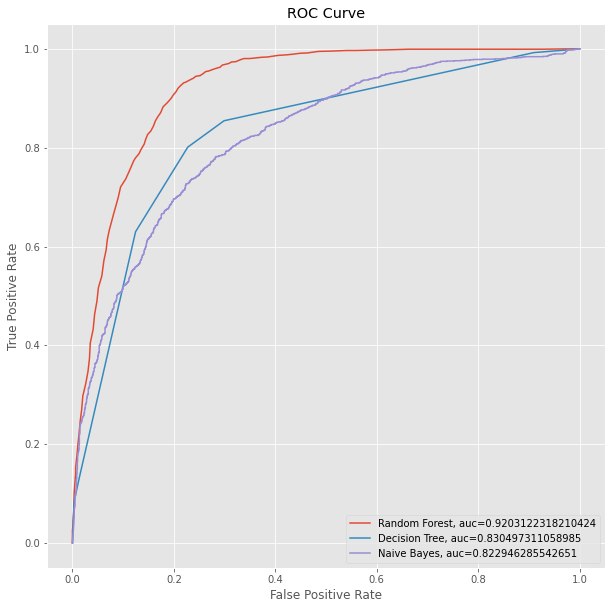

In [27]:
# Comparing ROC Curve
plt.plot(fprrfc,tprrfc,label="Random Forest, auc="+str(aucrfc))
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
# Create Datafame Contains Fature and Result of prediction
df_compare = X_test.copy()
df_compare['deposit'] = y_test
df_compare['DecisonTree'] = y_pred_dtc
df_compare['NaiveBayes'] = y_pred_gnb
df_compare['RandomForest'] = y_pred_rfc

In [ ]:
df_compare.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,deposit,DecisonTree,NaiveBayes,RandomForest
8422,31,0,554,1,0,5,94,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9226,43,0,514,1,1,20,34,2,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8162,26,0,277,0,0,14,514,2,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
4337,39,0,91,0,0,3,213,1,185,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
2438,40,0,0,0,0,6,131,2,98,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1
